In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

In [ ]:
# Load the dataset
dataset = pd.read_csv('Arabic Sentiment Analysis Dataset - SS2030.csv')

In [ ]:
print(dataset['text'].head(10))

0              حقوق المرأة 💚💚💚 https://t.co/Mzf90Ta5g1
1    RT @___IHAVENOIDEA: حقوق المرأة في الإسلام. ht...
2    RT @saud_talep: Retweeted لجنة التنمية بشبرا (...
3    RT @MojKsa: حقوق المرأة التي تضمنها لها وزارة ...
4    RT @abm112211: ولي امر الزوجة او ولي الزوجة او...
5    RT @fatemaar7: انا كامرأة يوجعني كل حزن نساء ا...
6    @Samar_K_ 😂😂😂😂😂\n اومن حقوق المرأة \n أنك تفتح...
7    @AliFCD @ShamsanM @AlyemenNor @space_dist @m2r...
8          مبدائيا انا مع حقوق المرأة وضد حقوق الرجل 😁
9    RT @Dresraamohammed: السؤال بقى للناس الي شغال...
Name: text, dtype: object


In [ ]:
print(dataset['Sentiment'].head(10))

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Sentiment, dtype: int64


In [ ]:
print(dataset['text'][2])

RT @saud_talep: Retweeted لجنة التنمية بشبرا (@Shubratanmyeh):
 
 ما زال التسجيل مستمر في دورة حقوق المرأة بعد الطلاق ✨ #وعيك_يحميك... https://t.co/c2NXzNCdLU


In [ ]:
# Function to extract only Arabic words from a text
def extract_arabic_words(text):
    if isinstance(text, str):  # Ensure it's a string
        arabic_words = re.findall(r'[\u0600-\u06FF]+', text)
        return " ".join(arabic_words)
    return ""

In [ ]:
# Apply the function to the dataset
dataset["cleaned_text"] = dataset["text"].apply(extract_arabic_words)

In [ ]:
# Display the first few cleaned rows
print(dataset.head())

                                                text  Sentiment  \
0            حقوق المرأة 💚💚💚 https://t.co/Mzf90Ta5g1          1   
1  RT @___IHAVENOIDEA: حقوق المرأة في الإسلام. ht...          1   
2  RT @saud_talep: Retweeted لجنة التنمية بشبرا (...          1   
3  RT @MojKsa: حقوق المرأة التي تضمنها لها وزارة ...          1   
4  RT @abm112211: ولي امر الزوجة او ولي الزوجة او...          1   

                                        cleaned_text  
0                                        حقوق المرأة  
1                             حقوق المرأة في الإسلام  
2  لجنة التنمية بشبرا ما زال التسجيل مستمر في دور...  
3            حقوق المرأة التي تضمنها لها وزارة العدل  
4  ولي امر الزوجة او ولي الزوجة او ولي المراة من ...  


In [ ]:
print(dataset['text'].head(10))

0              حقوق المرأة 💚💚💚 https://t.co/Mzf90Ta5g1
1    RT @___IHAVENOIDEA: حقوق المرأة في الإسلام. ht...
2    RT @saud_talep: Retweeted لجنة التنمية بشبرا (...
3    RT @MojKsa: حقوق المرأة التي تضمنها لها وزارة ...
4    RT @abm112211: ولي امر الزوجة او ولي الزوجة او...
5    RT @fatemaar7: انا كامرأة يوجعني كل حزن نساء ا...
6    @Samar_K_ 😂😂😂😂😂\n اومن حقوق المرأة \n أنك تفتح...
7    @AliFCD @ShamsanM @AlyemenNor @space_dist @m2r...
8          مبدائيا انا مع حقوق المرأة وضد حقوق الرجل 😁
9    RT @Dresraamohammed: السؤال بقى للناس الي شغال...
Name: text, dtype: object


In [ ]:
print(dataset['cleaned_text'].head(10))

0                                          حقوق المرأة
1                               حقوق المرأة في الإسلام
2    لجنة التنمية بشبرا ما زال التسجيل مستمر في دور...
3              حقوق المرأة التي تضمنها لها وزارة العدل
4    ولي امر الزوجة او ولي الزوجة او ولي المراة من ...
5    انا كامرأة يوجعني كل حزن نساء العالم، سواء تعن...
6                   اومن حقوق المرأة أنك تفتحلها الباب
7    غسق و سبيس و حلوة الحلوات هم اشخاص لهم هويتهم ...
8            مبدائيا انا مع حقوق المرأة وضد حقوق الرجل
9    السؤال بقى للناس الي شغاله في حقوق الانسان حقو...
Name: cleaned_text, dtype: object


In [ ]:
df0 = dataset[dataset['Sentiment']==0]
df1 = dataset[dataset['Sentiment']==1]

In [ ]:
print (df0)

                                                   text  Sentiment  \
75    RT @Alyahyamo7ammad: #تضامن_مع_ترف_العسيري\n أ...          0   
76    @Ania27El نحن في زمن كثر فيه دعاة الحرية وحقوق...          0   
77                              حقوق المرأة افكار وهميه          0   
78    RT @semo55771076: @___IHAVENOIDEA لا تقول حقوق...          0   
79    @Badro_0 مشكلتنا في من يعتقد ان مخالفت التعالي...          0   
...                                                 ...        ...   
3996  #مهندسون_معطلون_في_ياهلا بلد المشاريع بلد الخي...          0   
3997  #مهندسون_معطلون_في_ياهلا المشكله الرئيسية مو ف...          0   
3998  #مهندسون_معطلون_في_ياهلا الحلول الموقته للوضاي...          0   
3999     #مهندسون_معطلون_في_ياهلا \n اويلي هالعمر راح 💔          0   
4000  #تمهير طالبين مهندس مدني بدون خبرة ويرفضوني عش...          0   

                                           cleaned_text  
75    تضامن مع ترف العسيري أختي المسلمة حجابك، حشمتك...  
76    نحن في زمن كثر فيه دعاة الحرية وحقوقه

In [ ]:
print (df1)

                                                   text  Sentiment  \
0               حقوق المرأة 💚💚💚 https://t.co/Mzf90Ta5g1          1   
1     RT @___IHAVENOIDEA: حقوق المرأة في الإسلام. ht...          1   
2     RT @saud_talep: Retweeted لجنة التنمية بشبرا (...          1   
3     RT @MojKsa: حقوق المرأة التي تضمنها لها وزارة ...          1   
4     RT @abm112211: ولي امر الزوجة او ولي الزوجة او...          1   
...                                                 ...        ...   
4247                        #غرد_بحبك_لمحمد_بن_سلمان ❤️          1   
4248  #غرد_بحبك_لمحمد_بن_سلمان \n محمدبن سلمان احبه ...          1   
4249  #غرد_بحبك_لمحمد_بن_سلمان \n الله يحفظك يا ذخر ...          1   
4250  #غرد_بحبك_لمحمد_بن_سلمان \n \n الله يحفظه ويحم...          1   
4251  #غرد_بحبك_لمحمد_بن_سلمان \n \n احبه احبه ياخي ...          1   

                                           cleaned_text  
0                                           حقوق المرأة  
1                                حقوق المرأ

In [ ]:
print(df1.columns)  # Check the column names

Index(['text', 'Sentiment', 'cleaned_text'], dtype='object')


In [ ]:
print(df0.columns)  # Check the column names

Index(['text', 'Sentiment', 'cleaned_text'], dtype='object')


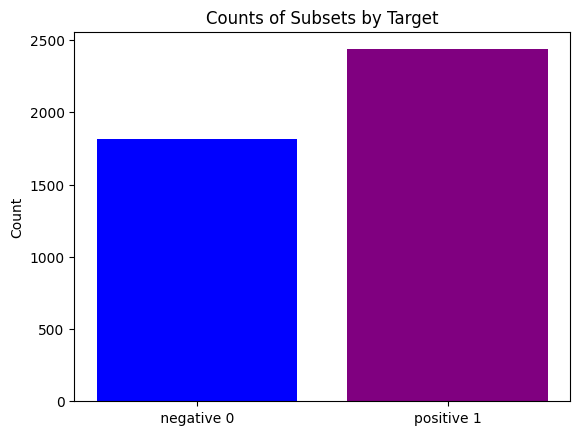

In [ ]:
counts = [len(df0), len(df1)]
plt.bar([' negative 0 ', 'positive 1'], counts, color=['blue','purple'])
plt.ylabel('Count')
plt.title('Counts of Subsets by Target')
plt.show()

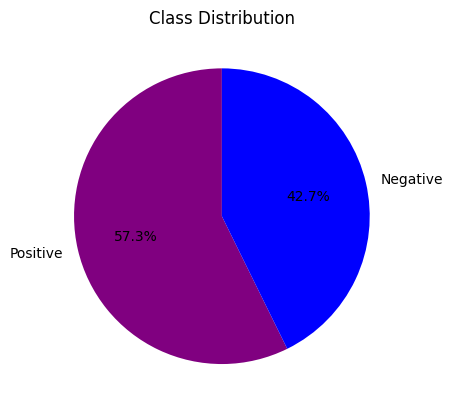

In [ ]:
# Class Distribution Visualization
class_counts = dataset['Sentiment'].value_counts()
plt.pie(class_counts, labels=['Positive', 'Negative'], autopct='%1.1f%%', startangle=90, colors=['purple', 'blue'])
plt.title('Class Distribution')
plt.show()

In [ ]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Load and preprocess data
stemmer = ISRIStemmer()
stop_words = set(stopwords.words('arabic'))
print (stop_words)

{'نحن', 'أقل', 'تاء', 'تِي', 'عما', 'ئ', 'لكن', 'حيَّ', 'ش', 'هذا', 'راح', 'أفٍّ', 'هَاتَيْنِ', 'كثيرا', 'أفعل به', 'فلان', 'أم', 'هيهات', 'ق', 'ذين', 'مكانكم', 'إلّا', 'نيف', 'أصبح', 'ذا', 'أنتِ', 'رابع', 'فيه', 'أنًّ', 'جلل', 'ذانِ', 'هَذِي', 'تي', 'أطعم', 'هللة', 'بمن', 'مليم', 'إي', 'تسعة', 'أيلول', 'عاد', 'آه', 'مه', 'ثمانون', 'مكانكما', 'أخبر', 'كيف', 'هيت', 'به', 'هَجْ', 'مئتان', 'أولالك', 'هاء', 'ستين', 'أنت', 'له', 'ليس', 'ثالث', 'إذما', 'وجد', 'ستمائة', 'أمد', 'ّأيّان', 'أربعة', 'ذَيْنِ', 'طاق', 'لعمر', 'وراءَك', 'اربعين', 'ظلّ', 'اللاتي', 'كرب', 'هاتي', 'الذين', 'حاء', 'أفريل', 'تَيْنِ', 'ذان', 'خبَّر', 'بطآن', 'معاذ', 'عين', 'إذن', 'ذي', 'ذينك', 'ولكن', 'شتانَ', 'تجاه', 'أمس', 'هذين', 'مايو', 'أمّا', 'لا', 'شَتَّانَ', 'فبراير', 'أجمع', 'لكنما', 'أو', 'عدا', 'ك', 'ماذا', 'تِه', 'تسعين', 'آض', 'والذي', 'لو', 'كأي', 'بك', 'ثماني', 'كسا', 'هلّا', 'ء', 'أخٌ', 'كن', 'منها', 'ارتدّ', 'أيا', 'قبل', 'هَذا', 'ذيت', 'قاطبة', 'دون', 'فوق', 'لي', 'فيما', 'رُبَّ', 'ليست', 'عامة', 'صار', 

In [ ]:
def remove_stop_words(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    return " ".join([stemmer.stem(word) for word in words if word not in stop_words])

In [ ]:
# Ensure the 'text' column contains valid strings
dataset['cleaned_text'] = dataset['cleaned_text'].astype(str)  # Convert all values to strings

# Handle cases where the text might be "nan" (converted from NaN)
dataset['cleaned_text'] = dataset['cleaned_text'].replace('nan', '', regex=False)

# Apply the cleaning function to the 'text' column
dataset['cleaned_text'] = dataset['cleaned_text'].apply(remove_stop_words)

In [ ]:
# Split dataset into features (X) and labels (y)
X = dataset['cleaned_text']
y = dataset['Sentiment']
print(X)
print(y)

0                                                 حقق رأة
1                                             حقق رأة سلم
2         لجن نمي شبر زال سجل سمر دور حقق رأة طلق وعك يحم
3                                     حقق رأة تضم وزر عدل
4       ولي امر زوج او ولي زوج او ولي راة خطء شئع كلم ...
                              ...                        
4247                                   غرد بحب حمد بن سلم
4248    غرد بحب حمد بن سلم حمدب سلم احب الل خار لوق لش...
4249               غرد بحب حمد بن سلم الل حفظ ذخر وطن يخل
4250           غرد بحب حمد بن سلم الل حفظ يحم يقو وكل معه
4251                       غرد بحب حمد بن سلم احب احب يخي
Name: cleaned_text, Length: 4252, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
4247    1
4248    1
4249    1
4250    1
4251    1
Name: Sentiment, Length: 4252, dtype: int64


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Save the vectorizer and model for future use
with open('NLPModel/vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)
with open('NLPModel/model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.863689776733255
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       363
           1       0.85      0.93      0.89       488

    accuracy                           0.86       851
   macro avg       0.87      0.85      0.86       851
weighted avg       0.87      0.86      0.86       851



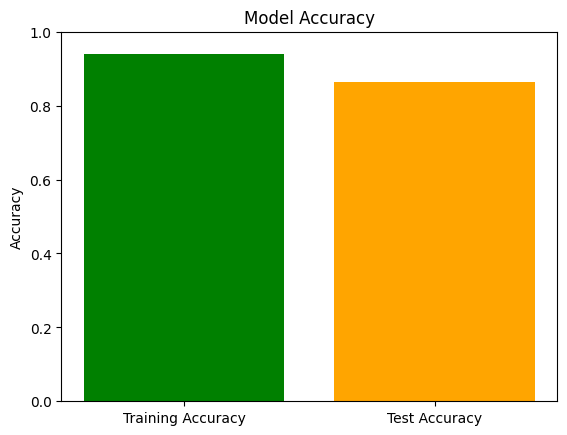

In [ ]:
# Visualize training and test accuracy
train_accuracy = model.score(X_train_tfidf, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

accuracy_values = [train_accuracy, test_accuracy]
accuracy_labels = ['Training Accuracy', 'Test Accuracy']

plt.bar(accuracy_labels, accuracy_values, color=['green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.show()

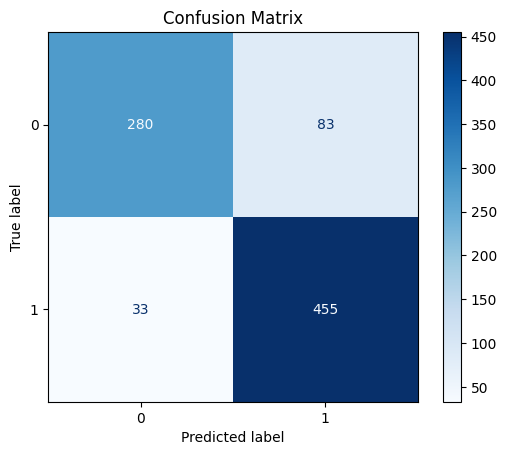

In [ ]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Load and predict with saved model (example usage)
with open('NLPModel/vectorizer.pkl', 'rb') as vec_file:
    loaded_vectorizer = pickle.load(vec_file)
with open('NLPModel/model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [ ]:
# Example prediction
sample_text = " كذبتم لم نشاهد حقوق المرأه من سكن ووظيفه ورفع شأنها من الفقر لم نشاهد سواء رضوخكم للغرب وتفعيل خطتهم المستدامه 2030 من قيادتها للسياره علشان إرضاء ترامب زجها في الملاعب مع الرجال مشاهده العراه من المصارعين بجدة رقصها في حفلات الترفيه دعم تبرجها وسفورها بالضبط انتم تفعلونها"
cleaned_sample = remove_stop_words(sample_text)
sample_tfidf = loaded_vectorizer.transform([cleaned_sample])
predicted_label = loaded_model.predict(sample_tfidf)
print(f"Predicted Label for '{sample_text}': {predicted_label[0]}")

Predicted Label for ' كذبتم لم نشاهد حقوق المرأه من سكن ووظيفه ورفع شأنها من الفقر لم نشاهد سواء رضوخكم للغرب وتفعيل خطتهم المستدامه 2030 من قيادتها للسياره علشان إرضاء ترامب زجها في الملاعب مع الرجال مشاهده العراه من المصارعين بجدة رقصها في حفلات الترفيه دعم تبرجها وسفورها بالضبط انتم تفعلونها': 0


In [ ]:
# Example prediction
sample_text ="ما زال التسجيل مستمر في دورة حقوق المرأة بعد الطلاق"
cleaned_sample = remove_stop_words(sample_text)
sample_tfidf = loaded_vectorizer.transform([cleaned_sample])
predicted_label = loaded_model.predict(sample_tfidf)
print(f"Predicted Label for '{sample_text}': {predicted_label[0]}")

Predicted Label for 'ما زال التسجيل مستمر في دورة حقوق المرأة بعد الطلاق': 1
